#### Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, balanced_accuracy_score, f1_score, precision_recall_curve, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from scipy.stats import loguniform
from sklearn.model_selection import train_test_split, GridSearchCV,  StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lightgbm as lgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from matplotlib import pyplot as plt
import warnings
import joblib
warnings.filterwarnings("ignore")

In [2]:
!gdown 1kUjl85uNp0ypFI7NZfP8Vyf8N9a250n4

Downloading...
From: https://drive.google.com/uc?id=1kUjl85uNp0ypFI7NZfP8Vyf8N9a250n4
To: c:\Users\avats\Desktop\sepsis\data.csv

  0%|          | 0.00/27.9M [00:00<?, ?B/s]
  2%|▏         | 524k/27.9M [00:00<00:15, 1.80MB/s]
  4%|▍         | 1.05M/27.9M [00:00<00:18, 1.49MB/s]
  6%|▌         | 1.57M/27.9M [00:00<00:15, 1.71MB/s]
  8%|▊         | 2.10M/27.9M [00:01<00:16, 1.56MB/s]
  9%|▉         | 2.62M/27.9M [00:01<00:15, 1.65MB/s]
 11%|█▏        | 3.15M/27.9M [00:01<00:14, 1.72MB/s]
 13%|█▎        | 3.67M/27.9M [00:02<00:13, 1.75MB/s]
 15%|█▌        | 4.19M/27.9M [00:02<00:12, 1.83MB/s]
 17%|█▋        | 4.72M/27.9M [00:02<00:11, 1.94MB/s]
 19%|█▉        | 5.24M/27.9M [00:03<00:13, 1.62MB/s]
 21%|██        | 5.77M/27.9M [00:03<00:12, 1.74MB/s]
 23%|██▎       | 6.29M/27.9M [00:03<00:12, 1.68MB/s]
 24%|██▍       | 6.82M/27.9M [00:03<00:10, 1.95MB/s]
 26%|██▋       | 7.34M/27.9M [00:03<00:08, 2.35MB/s]
 30%|███       | 8.39M/27.9M [00:04<00:06, 3.12MB/s]
 34%|███▍      | 9.44M/27.9M [00

##### Preprocessing

In [3]:
df=pd.read_csv('data.csv',low_memory=False,header=None)
new_headers = df.iloc[:, 0]
df = df.iloc[:, 1:]
df=df.transpose()
df.columns = new_headers
df.index = pd.RangeIndex(start=0, stop=768, step=1)

In [4]:
df.head()

,AAMDC,AASDHPPT,ABAT,ABCB10,ABCC2,ABCC4,ABCC9,ABCD3,ABCF1,ABHD13,...,ZSCAN2,ZSCAN29,ZSCAN32,ZSWIM8,ZW10,ZYG11B,ZZZ3,Sex,Age,Mortality
0,7.302387879,6.915275419,3.880092329,7.265627969,3.524146891,7.643898217,4.941341144,6.19478883,6.798724676,3.103447971,...,4.501835327,4.688715451,7.762803474,10.06509576,7.719832816,10.12415755,7.126248317,male,70,Dead
1,6.542648675,6.049382964,4.261555699,6.6681257,6.440577194,8.045913278,4.633716164,5.779594415,6.607669718,4.384159808,...,3.623359956,5.467375114,7.823195203,10.67791728,7.011917178,10.42467572,6.418866819,male,64,Survived
2,6.98866338,6.31161969,5.81787892,7.171268477,4.780891104,7.651797426,3.805096738,5.748837702,6.802867569,5.20373181,...,5.544115036,5.294168044,7.76118093,10.10972458,7.519756444,10.26586309,6.998564679,male,47,Survived
3,7.150254715,6.560917906,4.827277287,7.124046243,3.199669347,7.161897385,4.001520159,5.87260842,6.694095501,3.056026607,...,4.651320534,4.865154645,7.904202188,9.781928906,7.766247124,9.663124511,7.105417619,female,71,Survived
4,6.509507635,6.592466633,5.487019127,6.648482473,3.878681395,7.776907558,4.488685466,6.216505901,6.082013572,4.766600276,...,3.046280931,4.754908668,8.046214695,10.33621951,6.798046218,9.955112901,6.572652885,male,45,Survived


##### Empty Values


In [5]:
empty_values_count = df.isna().sum()
print(empty_values_count[empty_values_count>0])

0
Sex    1
dtype: int64


In [6]:
df['Sex'].value_counts()

Sex
male      442
female    325
Name: count, dtype: int64

In [7]:
df["Sex"].fillna( method ='ffill', inplace = True)

In [8]:
one_hot_encoder = OneHotEncoder()
encoded_gender = one_hot_encoder .fit_transform(df[['Sex']]).toarray()
encoded_gender_df = pd.DataFrame(encoded_gender, columns=one_hot_encoder .get_feature_names_out(['Sex']))
df = pd.concat([df, encoded_gender_df], axis=1)
df = df.drop('Sex', axis=1)
print("One-Hot Encoding rules:")
print(one_hot_encoder.get_feature_names_out(['Sex']))

One-Hot Encoding rules:
['Sex_female' 'Sex_male']


In [9]:
df['Mortality'].value_counts()

Mortality
Survived    553
Dead        215
Name: count, dtype: int64

In [10]:
label_encoder = LabelEncoder()
df['Mortality'] = label_encoder.fit_transform(df['Mortality'])
print("Label Encoding rules:")
for idx, class_ in enumerate(label_encoder.classes_):
    print(f"{class_} -> {idx}")

Label Encoding rules:
Dead -> 0
Survived -> 1


In [11]:
# Converting Columns that are Objects into Numeric Values
df = df.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtype == 'object' else col)

In [12]:
df.head()

,AAMDC,AASDHPPT,ABAT,ABCB10,ABCC2,ABCC4,ABCC9,ABCD3,ABCF1,ABHD13,...,ZSCAN29,ZSCAN32,ZSWIM8,ZW10,ZYG11B,ZZZ3,Age,Mortality,Sex_female,Sex_male
0,7.302388,6.915275,3.880092,7.265628,3.524147,7.643898,4.941341,6.194789,6.798725,3.103448,...,4.688715,7.762803,10.065096,7.719833,10.124158,7.126248,70,0,0.0,1.0
1,6.542649,6.049383,4.261556,6.668126,6.440577,8.045913,4.633716,5.779594,6.607670,4.384160,...,5.467375,7.823195,10.677917,7.011917,10.424676,6.418867,64,1,0.0,1.0
2,6.988663,6.311620,5.817879,7.171268,4.780891,7.651797,3.805097,5.748838,6.802868,5.203732,...,5.294168,7.761181,10.109725,7.519756,10.265863,6.998565,47,1,0.0,1.0
3,7.150255,6.560918,4.827277,7.124046,3.199669,7.161897,4.001520,5.872608,6.694096,3.056027,...,4.865155,7.904202,9.781929,7.766247,9.663125,7.105418,71,1,1.0,0.0
4,6.509508,6.592467,5.487019,6.648482,3.878681,7.776908,4.488685,6.216506,6.082014,4.766600,...,4.754909,8.046215,10.336220,6.798046,9.955113,6.572653,45,1,0.0,1.0


##### Negative Values

In [13]:
numeric_columns = df.select_dtypes(include=[int, float]).columns
negative_values = df[numeric_columns][df[numeric_columns] < 0].sum()
columns_with_negative_values = df[numeric_columns].columns[(df[numeric_columns] < 0).any()]

print(negative_values.abs().sum())
print(columns_with_negative_values)

3.40339323
Index(['CCSER2', 'DNHD1', 'DNM3', 'GRTP1', 'GPC2', 'RAB3IP', 'GRIN3B',
       'USP11'],
      dtype='object')


#### EDA

In [14]:
df['Age'].unique()

array([70, 64, 47, 71, 45, 56, 76, 51, 63, 43, 36, 59, 79, 62, 75, 32, 72,
       66, 49, 78, 87, 35, 61, 85, 60, 57, 41, 77, 54, 74, 50, 84, 73, 58,
       88, 40, 67, 48, 29, 65, 38, 42, 81, 39, 34, 53, 80, 46, 55, 52, 82,
       18, 21, 89, 69, 86, 33, 83, 23, 26, 68, 24, 25, 19, 44, 28, 90, 20,
       30, 22, 91, 17, 92, 37, 27, 31], dtype=int64)

##### Ranges

In [15]:
df_genes=df.drop(columns=['Sex_male','Sex_female','Mortality','Age'],axis=1)
df_genes = df_genes.melt(var_name='Column', value_name='Value')
df_genes['Value'] = pd.to_numeric(df_genes['Value'], errors='coerce')

In [16]:
df_genes['Value'].describe()

count    2.456832e+06
mean     1.554408e+01
std      2.188081e+02
min     -4.739031e-01
25%      5.124100e+00
50%      7.067572e+00
75%      8.585728e+00
max      1.273849e+05
Name: Value, dtype: float64

<Axes: >

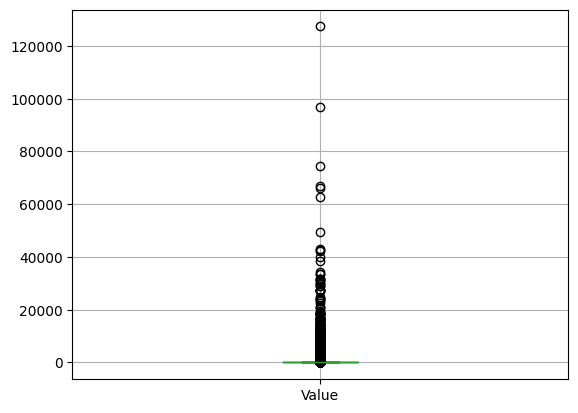

In [17]:
df_genes.boxplot(column='Value')

#### Extraction

In [18]:
X = df.drop(['Mortality'], axis=1)
y = df.Mortality
X = X.to_numpy()
y = y.to_numpy()

In [19]:
# Count occurrences of unique values in the NumPy array 'y'
unique, counts = np.unique(y, return_counts=True)
# Get the count of the most frequent value
target_count = max(counts)
smote = SMOTE(sampling_strategy={0: target_count, 1: target_count}, random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

In [20]:
print("Original dataset shape:", Counter(y))
print("SMOTE resampled dataset shape:", Counter(y_resampled_smote))
# X,y= X_resampled_smote, y_resampled_smote


Original dataset shape: Counter({1: 553, 0: 215})
SMOTE resampled dataset shape: Counter({0: 553, 1: 553})


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

In [22]:
result=pd.DataFrame(columns=["Model","Accuracy", "Balanced Accuracy","F1","Recall","Precision","ROC-AUC","Confusion Matrix"])

def metrics(model,name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    matrix= confusion_matrix(y_test, y_pred)
    if hasattr(model, 'predict_proba'):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        if hasattr(model, 'decision_function'):
            decision_scores = model.decision_function(X_test)
            y_probs = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
        else:
            raise AttributeError(f"{name} does not have predict_proba or decision_function")
    roc_auc = roc_auc_score(y_test, y_probs)

    cmd = ConfusionMatrixDisplay(matrix, display_labels=['survive', "death"])
    cmd.plot(cmap='Wistia');
    result.loc[len(result)] = [name, accuracy, balanced_accuracy, f1, recall, precision,roc_auc, matrix.tolist()]
    return result


#### Logistic Regression

##### Grid Searching

In [23]:
# ## DO NOT EXECUTE THIS CELL ##

# grid= {
#     'solver': ['newton-cg', 'lbfgs', 'liblinear'],
#     'penalty':['elasticnet', 'l1', 'l2'],
#     'C': np.logspace(-1, 3, 10) #check C values
#     }

# cv = StratifiedKFold(n_splits=5)
# gridsearch=GridSearchCV(estimator=LogisticRegression(max_iter=10000), param_grid=grid, cv=cv, scoring = "f1")
# gridsearch.fit(X,y)
# params = gridsearch.best_params_

##### Model Training

In [24]:
# print(params)
params= {'C': 0.774263682681127, 'penalty': 'l2', 'solver': 'liblinear'}
logreg = LogisticRegression(**params)
logreg.fit(X_train, y_train)
metrics(logreg,'LR')

,Model,Accuracy,Balanced Accuracy,F1,Recall,Precision,ROC-AUC,Confusion Matrix
0,LR,0.766234,0.624136,0.853659,0.945946,0.777778,0.71653,"[[13, 30], [6, 105]]"


####    Random Forest


##### Grid Searching

In [25]:
# # ## DO NOT EXECUTE THIS CELL ##

# grid = {
#     'bootstrap': [True],
#     'max_depth': [ 90, 100,110,120,130,140],
#     'max_features': [5,6,7,8],
#     'min_samples_leaf': [2, 3],
#     'min_samples_split': [10,12,14],
#     'n_estimators': [30,40,50, 60, 70,]
# }
# cv = StratifiedKFold(n_splits=5)
# gridsearch=GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=cv, scoring = "f1",n_jobs = -1)
# gridsearch.fit(X,y)
# params = gridsearch.best_params_

##### Model Training

In [26]:
# print(params)
params= {'bootstrap': True, 'max_depth': 90, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 60}
RF = RandomForestClassifier(**params)
RF.fit(X_train, y_train)
metrics(RF,'RF')

,Model,Accuracy,Balanced Accuracy,F1,Recall,Precision,ROC-AUC,Confusion Matrix
0,LR,0.766234,0.624136,0.853659,0.945946,0.777778,0.716530,"[[13, 30], [6, 105]]"
1,RF,0.746753,0.553635,0.849421,0.990991,0.743243,0.786298,"[[5, 38], [1, 110]]"


#### Bagging

##### Grid Search

In [27]:
# # ## DO NOT EXECUTE THIS CELL ##

# grid={'n_estimators': [10, 100, 1000]}
# cv = StratifiedKFold(n_splits=5)
# grid_search = GridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier()), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# grid_search.fit(X, y)
# params = grid_search.best_params_

##### Model Training

In [28]:
# print(params)
params={'n_estimators': 100}
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(),**params)
bagging.fit(X_train, y_train)
metrics(bagging,'Bagging')

,Model,Accuracy,Balanced Accuracy,F1,Recall,Precision,ROC-AUC,Confusion Matrix
0,LR,0.766234,0.624136,0.853659,0.945946,0.777778,0.716530,"[[13, 30], [6, 105]]"
1,RF,0.746753,0.553635,0.849421,0.990991,0.743243,0.786298,"[[5, 38], [1, 110]]"
2,Bagging,0.798701,0.689399,0.870293,0.936937,0.812500,0.789650,"[[19, 24], [7, 104]]"


#### XGB

##### Grid Searching

In [29]:
## DO NOT EXECUTE THIS CELL ##

# estimator = XGBClassifier(
#     objective = 'binary:logistic',
#     enable_categorical = True,
#     nthread = 4,
#     seed = 42
# )
# grid = {
#     'max_depth': range (3, 5, 1),
#     'n_estimators': range(140, 200, 20),
#     'learning_rate': [0.1, 0.05]
# }
# gridsearch = GridSearchCV(estimator=estimator, param_grid=grid,scoring = 'f1', n_jobs = 8,  cv=5, verbose=True)
# gridsearch.fit(X,y)
# params = gridsearch.best_params_

##### Model Training

In [30]:
# print(params)
params={'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 160}
XGB = XGBClassifier(**params)
XGB.fit(X_train, y_train)
metrics(XGB,'XGB')

,Model,Accuracy,Balanced Accuracy,F1,Recall,Precision,ROC-AUC,Confusion Matrix
0,LR,0.766234,0.624136,0.853659,0.945946,0.777778,0.716530,"[[13, 30], [6, 105]]"
1,RF,0.746753,0.553635,0.849421,0.990991,0.743243,0.786298,"[[5, 38], [1, 110]]"
2,Bagging,0.798701,0.689399,0.870293,0.936937,0.812500,0.789650,"[[19, 24], [7, 104]]"
3,XGB,0.766234,0.652629,0.848739,0.909910,0.795276,0.793421,"[[17, 26], [10, 101]]"


#### LightGBM

##### Grid Searching

In [31]:
## DO NOT EXECUTE THIS CELL ##

# grid = {
#     'n_estimators': [60,70,80],
#     'learning_rate': [0.1,0.2],
#     'max_depth': [3,4],
#     'num_leaves': [6,8,10],
#     'subsample': [0.2],
#     'colsample_bytree': [0.8,0.9,1.0]
# }
# lgb_classifier = lgb.LGBMClassifier(force_col_wise=True)
# gridsearch = GridSearchCV(estimator=lgb_classifier, param_grid=grid, cv=5, scoring='accuracy', n_jobs=8)
# gridsearch.fit(X,y)
# params = gridsearch.best_params_

##### Model Training

In [32]:
# print(params)
params={'colsample_bytree':1.0, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 80, 'num_leaves': 10, 'subsample': 0.2}
lgb_classifier = XGBClassifier(**params)
lgb_classifier.fit(X_train, y_train)
metrics(lgb_classifier,'LGB')

,Model,Accuracy,Balanced Accuracy,F1,Recall,Precision,ROC-AUC,Confusion Matrix
0,LR,0.766234,0.624136,0.853659,0.945946,0.777778,0.716530,"[[13, 30], [6, 105]]"
1,RF,0.746753,0.553635,0.849421,0.990991,0.743243,0.786298,"[[5, 38], [1, 110]]"
2,Bagging,0.798701,0.689399,0.870293,0.936937,0.812500,0.789650,"[[19, 24], [7, 104]]"
3,XGB,0.766234,0.652629,0.848739,0.909910,0.795276,0.793421,"[[17, 26], [10, 101]]"
4,LGB,0.779221,0.690132,0.853448,0.891892,0.818182,0.790907,"[[21, 22], [12, 99]]"


#### KNN

##### Grid Search

In [33]:
# # ## DO NOT EXECUTE THIS CELL ##

# grid = {
#     'n_neighbors' : range(2, 21, 2),
#     'weights': ['uniform', 'distance'],
#     'metric' : ['euclidean', 'manhattan', 'minkowski']
#     }
# gridsearch = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)
# gridsearch.fit(X,y)
# params = gridsearch.best_params_

##### Model Training

In [34]:
# print(params)
params={'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
KNN = KNeighborsClassifier(**params)
KNN.fit(X_train, y_train)
metrics(KNN,'KNN')

,Model,Accuracy,Balanced Accuracy,F1,Recall,Precision,ROC-AUC,Confusion Matrix
0,LR,0.766234,0.624136,0.853659,0.945946,0.777778,0.716530,"[[13, 30], [6, 105]]"
1,RF,0.746753,0.553635,0.849421,0.990991,0.743243,0.786298,"[[5, 38], [1, 110]]"
2,Bagging,0.798701,0.689399,0.870293,0.936937,0.812500,0.789650,"[[19, 24], [7, 104]]"
3,XGB,0.766234,0.652629,0.848739,0.909910,0.795276,0.793421,"[[17, 26], [10, 101]]"
4,LGB,0.779221,0.690132,0.853448,0.891892,0.818182,0.790907,"[[21, 22], [12, 99]]"
5,KNN,0.707792,0.626336,0.800000,0.810811,0.789474,0.690551,"[[19, 24], [21, 90]]"


#### SVC

##### Grid Search

In [35]:
# # ## DO NOT EXECUTE THIS CELL ##


# grid = {
#     'kernel': ['linear','poly', 'rbf', 'sigmoid'],
#     'C': np.logspace(-3,3,7)
#     }
# gridsearch = GridSearchCV(estimator=SVC(), param_grid=grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)
# gridsearch.fit(X,y)
# params = gridsearch.best_params_

##### Model Training

In [36]:
# print(params)
params={'C': 0.01, 'kernel': 'linear'}
SVCClassifier = SVC(**params,probability=True)
SVCClassifier.fit(X_train, y_train)
metrics(SVCClassifier,'SVC')

,Model,Accuracy,Balanced Accuracy,F1,Recall,Precision,ROC-AUC,Confusion Matrix
0,LR,0.766234,0.624136,0.853659,0.945946,0.777778,0.716530,"[[13, 30], [6, 105]]"
1,RF,0.746753,0.553635,0.849421,0.990991,0.743243,0.786298,"[[5, 38], [1, 110]]"
2,Bagging,0.798701,0.689399,0.870293,0.936937,0.812500,0.789650,"[[19, 24], [7, 104]]"
3,XGB,0.766234,0.652629,0.848739,0.909910,0.795276,0.793421,"[[17, 26], [10, 101]]"
4,LGB,0.779221,0.690132,0.853448,0.891892,0.818182,0.790907,"[[21, 22], [12, 99]]"
5,KNN,0.707792,0.626336,0.800000,0.810811,0.789474,0.690551,"[[19, 24], [21, 90]]"
6,SVC,0.805195,0.715273,0.871795,0.918919,0.829268,0.796145,"[[22, 21], [9, 102]]"


#### Gaussian NB

##### Grid Search

In [37]:
# # ## DO NOT EXECUTE THIS CELL ##

# grid= {'var_smoothing': np.logspace(0,-10, num=30)}
# grid_search = GridSearchCV(estimator=GaussianNB(),param_grid=grid,cv=StratifiedKFold(n_splits=5),verbose=1,scoring='accuracy')
# grid_search.fit(X, y)
# params = grid_search.best_params_

##### Model Training

In [38]:
# print(params)
params= {'var_smoothing': 1.0}
GNB = GaussianNB(**params)
GNB.fit(X_train, y_train)
metrics(GNB,'GNB')

,Model,Accuracy,Balanced Accuracy,F1,Recall,Precision,ROC-AUC,Confusion Matrix
0,LR,0.766234,0.624136,0.853659,0.945946,0.777778,0.716530,"[[13, 30], [6, 105]]"
1,RF,0.746753,0.553635,0.849421,0.990991,0.743243,0.786298,"[[5, 38], [1, 110]]"
2,Bagging,0.798701,0.689399,0.870293,0.936937,0.812500,0.789650,"[[19, 24], [7, 104]]"
3,XGB,0.766234,0.652629,0.848739,0.909910,0.795276,0.793421,"[[17, 26], [10, 101]]"
4,LGB,0.779221,0.690132,0.853448,0.891892,0.818182,0.790907,"[[21, 22], [12, 99]]"
5,KNN,0.707792,0.626336,0.800000,0.810811,0.789474,0.690551,"[[19, 24], [21, 90]]"
6,SVC,0.805195,0.715273,0.871795,0.918919,0.829268,0.796145,"[[22, 21], [9, 102]]"
7,GNB,0.720779,0.500000,0.837736,1.000000,0.720779,0.532789,"[[0, 43], [0, 111]]"


#### Stacking

##### Model Training

In [39]:
level0 = list()
level0.append(('LogReg', logreg))
level0.append(('RF', RF))
level0.append(('XGB', XGB))
level0.append(('LGB', lgb_classifier))
level0.append(('KNN',KNN))
level0.append(('SVC', SVCClassifier))
level0.append(('GNB', GNB))
level1 = LogisticRegression(solver='liblinear')

stack = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
stack.fit(X_train, y_train)
metrics(stack,'Stacking')

,Model,Accuracy,Balanced Accuracy,F1,Recall,Precision,ROC-AUC,Confusion Matrix
0,LR,0.766234,0.624136,0.853659,0.945946,0.777778,0.716530,"[[13, 30], [6, 105]]"
1,RF,0.746753,0.553635,0.849421,0.990991,0.743243,0.786298,"[[5, 38], [1, 110]]"
2,Bagging,0.798701,0.689399,0.870293,0.936937,0.812500,0.789650,"[[19, 24], [7, 104]]"
3,XGB,0.766234,0.652629,0.848739,0.909910,0.795276,0.793421,"[[17, 26], [10, 101]]"
4,LGB,0.779221,0.690132,0.853448,0.891892,0.818182,0.790907,"[[21, 22], [12, 99]]"
5,KNN,0.707792,0.626336,0.800000,0.810811,0.789474,0.690551,"[[19, 24], [21, 90]]"
6,SVC,0.805195,0.715273,0.871795,0.918919,0.829268,0.796145,"[[22, 21], [9, 102]]"
7,GNB,0.720779,0.500000,0.837736,1.000000,0.720779,0.532789,"[[0, 43], [0, 111]]"
8,Stacking,0.792208,0.684894,0.865546,0.927928,0.811024,0.796774,"[[19, 24], [8, 103]]"


#### Result Analysis

In [40]:
result

,Model,Accuracy,Balanced Accuracy,F1,Recall,Precision,ROC-AUC,Confusion Matrix
0,LR,0.766234,0.624136,0.853659,0.945946,0.777778,0.716530,"[[13, 30], [6, 105]]"
1,RF,0.746753,0.553635,0.849421,0.990991,0.743243,0.786298,"[[5, 38], [1, 110]]"
2,Bagging,0.798701,0.689399,0.870293,0.936937,0.812500,0.789650,"[[19, 24], [7, 104]]"
3,XGB,0.766234,0.652629,0.848739,0.909910,0.795276,0.793421,"[[17, 26], [10, 101]]"
4,LGB,0.779221,0.690132,0.853448,0.891892,0.818182,0.790907,"[[21, 22], [12, 99]]"
5,KNN,0.707792,0.626336,0.800000,0.810811,0.789474,0.690551,"[[19, 24], [21, 90]]"
6,SVC,0.805195,0.715273,0.871795,0.918919,0.829268,0.796145,"[[22, 21], [9, 102]]"
7,GNB,0.720779,0.500000,0.837736,1.000000,0.720779,0.532789,"[[0, 43], [0, 111]]"
8,Stacking,0.792208,0.684894,0.865546,0.927928,0.811024,0.796774,"[[19, 24], [8, 103]]"


In [41]:
def get_roc_auc_scores_and_curves(models, X_test, y_test):
    ns_probs = [0 for _ in range(len(y_test))]
    ns_auc = roc_auc_score(y_test, ns_probs)
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    roc_data = {'No Skill': (ns_fpr, ns_tpr)}

    for name, model in models:
        if hasattr(model, 'predict_proba'):
            probs = model.predict_proba(X_test)[:, 1]
        else:
            if hasattr(model, 'decision_function'):
                decision_scores = model.decision_function(X_test)
                probs = (decision_scores - decision_scores.min()) / (decision_scores.max() - decision_scores.min())
            else:
                raise AttributeError(f"{name} does not have predict_proba or decision_function")

        auc = roc_auc_score(y_test, probs)
        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_data[name] = (fpr, tpr)

    return roc_data

models = level0 + [('Stacking', stack),('Bagging',bagging)]
roc_data = get_roc_auc_scores_and_curves(models, X_test, y_test)
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr) in roc_data.items():
    plt.plot(fpr, tpr, label=model_name)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
result

,Model,Accuracy,Balanced Accuracy,F1,Recall,Precision,ROC-AUC,Confusion Matrix
0,LR,0.766234,0.624136,0.853659,0.945946,0.777778,0.716530,"[[13, 30], [6, 105]]"
1,RF,0.746753,0.553635,0.849421,0.990991,0.743243,0.786298,"[[5, 38], [1, 110]]"
2,Bagging,0.798701,0.689399,0.870293,0.936937,0.812500,0.789650,"[[19, 24], [7, 104]]"
3,XGB,0.766234,0.652629,0.848739,0.909910,0.795276,0.793421,"[[17, 26], [10, 101]]"
4,LGB,0.779221,0.690132,0.853448,0.891892,0.818182,0.790907,"[[21, 22], [12, 99]]"
5,KNN,0.707792,0.626336,0.800000,0.810811,0.789474,0.690551,"[[19, 24], [21, 90]]"
6,SVC,0.805195,0.715273,0.871795,0.918919,0.829268,0.796145,"[[22, 21], [9, 102]]"
7,GNB,0.720779,0.500000,0.837736,1.000000,0.720779,0.532789,"[[0, 43], [0, 111]]"
8,Stacking,0.792208,0.684894,0.865546,0.927928,0.811024,0.796774,"[[19, 24], [8, 103]]"


In [45]:
if isinstance(X, pd.DataFrame):
    X = X.values
if isinstance(y, pd.Series):
    y = y.values

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
n_samples_minority = 172
sampling_strategy = {1: min(n_samples_minority, 200)}

classifiers = {
    'logreg': LogisticRegression(C=0.774263682681127, penalty='l2', solver='liblinear'),
    'RF': RandomForestClassifier(bootstrap=True, max_depth=90, max_features=8, min_samples_leaf=2,min_samples_split=10, n_estimators=60),
    'XGB': XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=160),
    'bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10),
    'LGB': lgb.LGBMClassifier(colsample_bytree=1.0, learning_rate=0.2, max_depth=4,n_estimators=80, num_leaves=10, subsample=0.2),
    'KNN': KNeighborsClassifier(metric='euclidean', n_neighbors=2, weights='distance'),
    'SVC': SVC(C=0.01, kernel='linear', probability=True),
    'GNB': GaussianNB(var_smoothing=1.0),
    'stack': stack  # Assuming 'stack' is defined elsewhere
}

resamplers = {
    'RandomUndersampling': RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42),
    'ROS': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'Baseline': None
}

# Function to evaluate model
def evaluate_model(clf, X, y, resampler=None):
    all_reports = []
    all_conf_matrices = []
    all_y_true = []
    all_y_pred = []

    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        if resampler:
            X_train, y_train = resampler.fit_resample(X_train, y_train)

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(np.unique(y_pred))

        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)

        report = classification_report(y_test, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        all_reports.append(report)
        all_conf_matrices.append(conf_matrix)

    avg_report = {}
    for label in all_reports[0].keys():
        if isinstance(all_reports[0][label], dict):
            avg_report[label] = {metric: np.mean([r[label][metric] for r in all_reports]) for metric in all_reports[0][label]}
        else:
            avg_report[label] = np.mean([r[label] for r in all_reports])

    avg_conf_matrix = np.mean(all_conf_matrices, axis=0)

    try:
        auc_roc = roc_auc_score(all_y_true, all_y_pred)
    except ValueError:
        auc_roc = np.nan

    return avg_report, avg_conf_matrix, auc_roc

results_df_class_0 = pd.DataFrame(columns=['Model', 'Resampler', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])
results_df_class_1 = pd.DataFrame(columns=['Model', 'Resampler', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])

for resample_name, resampler in resamplers.items():
    for model_name, model in classifiers.items():
        print(model_name,resample_name)
        avg_report, avg_conf_matrix, auc_roc = evaluate_model(model, X, y, resampler=resampler)
        precision_class_1 = avg_report.get('1', {}).get('precision', np.nan)
        recall_class_1 = avg_report.get('1', {}).get('recall', np.nan)
        f1_score_class_1 = avg_report.get('1', {}).get('f1-score', np.nan)
        accuracy_class_1 = avg_report.get('accuracy', np.nan)

        precision_class_0 = avg_report.get('0', {}).get('precision', np.nan)
        recall_class_0 = avg_report.get('0', {}).get('recall', np.nan)
        f1_score_class_0 = avg_report.get('0', {}).get('f1-score', np.nan)
        accuracy_class_0 = avg_report.get('accuracy', np.nan)

        # Collect results into DataFrames
        results_class_1 = {
            'Model': model_name,
            'Resampler': resample_name,
            'Accuracy': accuracy_class_1,
            'Precision': precision_class_1,
            'Recall': recall_class_1,
            'F1 Score': f1_score_class_1,
            'AUC-ROC': auc_roc
        }
        results_class_0 = {
            'Model': model_name,
            'Resampler': resample_name,
            'Accuracy': accuracy_class_0,
            'Precision': precision_class_0,
            'Recall': recall_class_0,
            'F1 Score': f1_score_class_0,
            'AUC-ROC': auc_roc
        }

        # Append results to respective DataFrames
        results_df_class_1 = pd.concat([results_df_class_1, pd.DataFrame([results_class_1])], ignore_index=True)
        results_df_class_0 = pd.concat([results_df_class_0, pd.DataFrame([results_class_0])], ignore_index=True)




logreg RandomUndersampling
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
RF RandomUndersampling
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
XGB RandomUndersampling
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
bagging RandomUndersampling
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
LGB RandomUndersampling
[LightGBM] [Info] Number of positive: 172, number of negative: 172
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 366401
[LightGBM] [Info] Number of data points in the train set: 344, number of used features: 3202
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

In [46]:
results_df_class_1 


,Model,Resampler,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,logreg,RandomUndersampling,0.666675,0.829229,0.676282,0.743513,0.659086
1,RF,RandomUndersampling,0.647178,0.826253,0.645618,0.724461,0.648366
2,XGB,RandomUndersampling,0.669374,0.843510,0.663784,0.741652,0.673687
3,bagging,RandomUndersampling,0.592488,0.827951,0.547977,0.658136,0.627449
4,LGB,RandomUndersampling,0.675817,0.847503,0.670958,0.747963,0.679629
5,KNN,RandomUndersampling,0.635387,0.810286,0.643702,0.716600,0.628857
6,SVC,RandomUndersampling,0.706969,0.862162,0.706912,0.775893,0.707015
7,GNB,RandomUndersampling,0.468347,0.719843,0.418247,0.396687,0.507439
8,stack,RandomUndersampling,0.578126,0.696971,0.732416,0.714037,0.456882
9,logreg,ROS,0.696630,0.827765,0.730581,0.775217,0.669931


In [47]:
results_df_class_0

,Model,Resampler,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,logreg,RandomUndersampling,0.666675,0.440495,0.641860,0.520219,0.659086
1,RF,RandomUndersampling,0.647178,0.417873,0.651163,0.508620,0.648366
2,XGB,RandomUndersampling,0.669374,0.445325,0.683721,0.537747,0.673687
3,bagging,RandomUndersampling,0.592488,0.379747,0.706977,0.493234,0.627449
4,LGB,RandomUndersampling,0.675817,0.450525,0.688372,0.543376,0.679629
5,KNN,RandomUndersampling,0.635387,0.404747,0.613953,0.486633,0.628857
6,SVC,RandomUndersampling,0.706969,0.485399,0.706977,0.574205,0.707015
7,GNB,RandomUndersampling,0.468347,0.321503,0.595349,0.307650,0.507439
8,stack,RandomUndersampling,0.578126,0.208958,0.181395,0.193536,0.456882
9,logreg,ROS,0.696630,0.473496,0.609302,0.530739,0.669931


In [48]:
# Select top 3 models based on AUC-ROC
top_models = results_df_class_1.sort_values(by='AUC-ROC', ascending=False).head(3)
top_model_names = top_models['Model'].unique()
top_resamplers = top_models['Resampler'].unique()
top_models

,Model,Resampler,Accuracy,Precision,Recall,F1 Score,AUC-ROC
6,SVC,RandomUndersampling,0.706969,0.862162,0.706912,0.775893,0.707015
20,XGB,SMOTE,0.770851,0.818385,0.877084,0.846219,0.687354
22,LGB,SMOTE,0.769519,0.814343,0.882441,0.846439,0.680765


In [50]:
results_df_class_1.to_csv('results_class_1.csv', index=False)
results_df_class_0.to_csv('results_class_0.csv', index=False)


In [1]:
import pandas as pd
import numpy as np
a=pd.read_csv('results_class_1.csv')
b=pd.read_csv('class_1.csv')
c=pd.read_csv('1.csv')
d=pd.read_csv('results_class_0.csv')
e=pd.read_csv('class_0.csv')
f=pd.read_csv('0.csv')
class_1=pd.concat([a,b,c],axis=0)
class_0=pd.concat([d,e,f],axis=0)


In [9]:
class_1[class_1['Resampler']=='SMOTE']

Model                   Resampler  Accuracy  Precision  Recall    F1 Score  AUC-ROC 
AdaBoost                SMOTE      0.828829  0.821429   0.828829  0.825112  0.768489    1
AdaBoost with PCA       SMOTE      0.810811  0.841121   0.810811  0.825688  0.790069    1
logreg                  SMOTE      0.674510  0.826195   0.694382  0.753219  0.658825    1
bagging                 SMOTE      0.692777  0.808116   0.750516  0.777852  0.647319    1
XGB                     SMOTE      0.770851  0.818385   0.877084  0.846219  0.687354    1
SVM with PCA            SMOTE      0.864865  0.857143   0.864865  0.860987  0.811439    1
SVM                     SMOTE      0.810811  0.810811   0.810811  0.810811  0.706893    1
SVC                     SMOTE      0.747398  0.816747   0.837248  0.826745  0.676765    1
Random Forest with PCA  SMOTE      0.882883  0.809917   0.882883  0.844828  0.806202    1
Random Forest           SMOTE      0.918919  0.803150   0.918919  0.857143  0.745548    1
RF             

In [4]:
class_0

,Model,Resampler,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,logreg,RandomUndersampling,0.666675,0.440495,0.641860,0.520219,0.659086
1,RF,RandomUndersampling,0.647178,0.417873,0.651163,0.508620,0.648366
2,XGB,RandomUndersampling,0.669374,0.445325,0.683721,0.537747,0.673687
3,bagging,RandomUndersampling,0.592488,0.379747,0.706977,0.493234,0.627449
4,LGB,RandomUndersampling,0.675817,0.450525,0.688372,0.543376,0.679629
...,...,...,...,...,...,...,...
15,ElasticNet,Baseline,0.718751,0.066667,0.004651,0.008696,0.500517
16,LDA,Baseline,0.667931,0.418900,0.474419,0.444037,0.608819
17,ExtraTrees,Baseline,0.757813,0.692982,0.246512,0.361100,0.601556
18,QDA,Baseline,0.419379,0.290166,0.734884,0.411134,0.515724


In [21]:
class_0.to_csv('resampling_class_0.csv',index=False)
class_1.to_csv('resampling_class_1.csv',index=False)